<a href="https://colab.research.google.com/github/masa512/PCA/blob/main/GMM_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm


# Part 1 : Generating gaussian sampled data from N distributions 
(we'll say N for now)

In [151]:
Nc = 3
means = np.random.randint(low=-5, high=5, size=(Nc,))
variances = 2*np.random.rand(Nc)
cluster_sizes = np.random.randint(low=20, high=50, size=(Nc,))
print(means)
print(variances)
print(cluster_sizes)

[ 2 -5 -2]
[1.59954619 0.92663418 1.25970607]
[44 20 24]


In [152]:
# We will generate data from each cluster

D = [np.random.normal(loc=m, scale=math.sqrt(s), size=(cs,)) for cs,m,s in zip(cluster_sizes,means,variances)]

# Each element of D has data sampled by kth cluster

In [153]:
print(D[0].shape)
print(D[1].shape)
print(D[2].shape)

(44,)
(20,)
(24,)


Text(0.5, 1.0, 'Scatter plot of the original data with proper label')

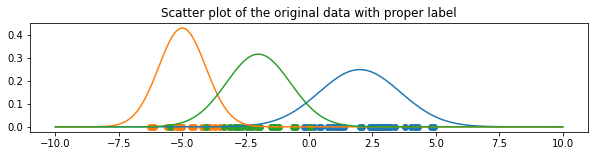

In [154]:
# We can plot the data in a scatter plot in different color
x_axis = np.linspace(start = -10, stop = 10, num = 200)

f = plt.figure(figsize=(10,2))
for k in range(len(D)):
  plt.scatter(D[k],np.zeros_like(D[k]))
  plt.plot(x_axis, norm.pdf(x_axis, means[k], variances[k]))
# We can also plot the gaussian on top 

plt.title('Scatter plot of the original data with proper label')



# Part 2 : GMM modeling sequence

In [155]:
def E_step(D,M,V,Pi):
  gamma = np.array([[norm(m,math.sqrt(v)).pdf(x) * pi for x in D] for m,v,pi in zip(M,V,Pi)])
  sum_gamma = np.sum(gamma,axis=0,keepdims=True)
  return gamma/sum_gamma

def eval_mean(gamma,D):
  # D has shape [ND,] and gamma has shape [NC,ND]
  num = np.sum(np.array([gamma[:,i]*D[i] for i in range(gamma.shape[1])]),axis=0,keepdims=False)
  den = np.sum(gamma,axis=1,keepdims=False)
  print(num/den)
  return num/den

def eval_std(gamma,M,D):
  # D is shape [ND x 1]
  # M is shape [NC x 1]
  # gamma is shape [NC,ND]

  num = np.array([[gamma[j,i]*(D[i]-M[j])*(D[i]-M[j]) for i in range(D.shape[0])] for j in range(gamma.shape[0])])
  
  num = np.sum(num,axis=1,keepdims=False)
  print(num.shape)
  den = np.sum(gamma,axis=1,keepdims=False)
  return num/den

def eval_pi(gamma):
  N = gamma.shape[1]
  return 1/N*np.sum(gamma,axis=1,keepdims=True)


class GMM_1D:

  def __init__(self,n_components):
    self.nc = n_components
    # initialize mean,variance,pi
    self.M = np.random.randint(low=-5, high=5, size=(self.nc,))
    self.V = np.random.rand(self.nc)
    self.Pi = 1/self.nc*np.ones((self.nc))  
  
  def load_data(self,D):

    # Takes data as a form of 1D array (N_data,)
    self.D = D
  
  def forward(self):

    # Contribution from E step
    gamma = E_step(self.D,self.M,self.V,self.Pi)

    # backprop to retrieve the new mean,variance,pi
    self.M = eval_mean(gamma,self.D).reshape((-1,))
    self.V = eval_std(gamma,self.M,self.D).reshape((-1,))
    self.Pi = eval_pi(gamma).reshape((-1,))

    


In [156]:
# Initiate gmm model
model = GMM_1D(3)

# Load the data into model
data = np.concatenate(D,axis=0)
model.load_data(data)

print(model.M)

[ 3 -1  1]


In [160]:
# We will do just one forward pass to debug the model
model.forward()


[ 2.76789289 -2.76912501 -0.60188302]
(3,)
